In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install textblob

     |████████████████████████████████| 636 kB 4.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [10]:
import requests
import pandas as pd
r=requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=b1b9c1754d027874eb14c4c695ce49fc&language=e n-US&page=1')
r.json()['results']
df=pd.DataFrame(r.json()['results'])[['id','title','overview','popularity','release_date','vote_average','vote_count']]
df.head()

,id,title,overview,popularity,release_date,vote_average,vote_count
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",118.143,1972-03-14,8.7,18186
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,116.652,1994-09-23,8.7,24067
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,58.067,1974-12-20,8.6,10970
3,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",28.977,1995-10-20,8.6,4162
4,424,Schindler's List,The true story of how businessman Oskar Schind...,52.387,1993-12-15,8.6,14228


In [11]:
df.to_csv('movies.csv')
df.head()

,id,title,overview,popularity,release_date,vote_average,vote_count
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",118.143,1972-03-14,8.7,18186
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,116.652,1994-09-23,8.7,24067
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,58.067,1974-12-20,8.6,10970
3,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",28.977,1995-10-20,8.6,4162
4,424,Schindler's List,The true story of how businessman Oskar Schind...,52.387,1993-12-15,8.6,14228


In [12]:
#Get movies title by highest vote count
df.sort_values(by='vote_count', ascending=False)[['title' , 'vote_count']].head()

,title,vote_count
10,The Dark Knight,30001
13,Pulp Fiction,25390
14,Forrest Gump,24910
1,The Shawshank Redemption,24067
16,The Lord of the Rings: The Return of the King,21801


In [13]:
#Get movies title by highest average vote
df.sort_values(by='vote_average', ascending=False)[['title' , 'vote_average']].head()

,title,vote_average
0,The Godfather,8.7
1,The Shawshank Redemption,8.7
2,The Godfather Part II,8.6
3,Dilwale Dulhania Le Jayenge,8.6
4,Schindler's List,8.6


In [14]:
#Get movies title by highest popularity
df.sort_values(by='popularity', ascending=False)[['title' , 'popularity']].head()

,title,popularity
7,Spider-Man: Across the Spider-Verse,1478.757
0,The Godfather,118.143
1,The Shawshank Redemption,116.652
10,The Dark Knight,95.314
16,The Lord of the Rings: The Return of the King,86.031


In [15]:
import datetime
df['release_date']= pd.to_datetime(df['release_date'])
df['year']=df['release_date'].dt.year

In [16]:
df[df['year']==2020][['title','year']][:5]

,title,year


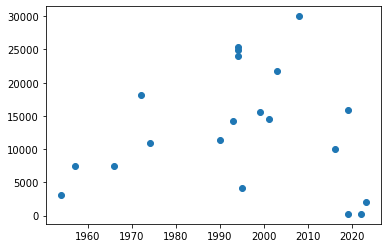

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df['year'],df['vote_count'])
plt.show()



In [19]:
import textblob
df['scores'] = df['overview'].apply(lambda x:textblob.TextBlob(x).sentiment.polarity)
print(df.head())

      id                        title  \
0    238                The Godfather   
1    278     The Shawshank Redemption   
2    240        The Godfather Part II   
3  19404  Dilwale Dulhania Le Jayenge   
4    424             Schindler's List   

                                            overview  popularity release_date  \
0  Spanning the years 1945 to 1955, a chronicle o...     118.143   1972-03-14   
1  Framed in the 1940s for the double murder of h...     116.652   1994-09-23   
2  In the continuing saga of the Corleone crime f...      58.067   1974-12-20   
3  Raj is a rich, carefree, happy-go-lucky second...      28.977   1995-10-20   
4  The true story of how businessman Oskar Schind...      52.387   1993-12-15   

   vote_average  vote_count  year    scores  
0           8.7       18186  1972 -0.250000  
1           8.7       24067  1994  0.021338  
2           8.6       10970  1974  0.118182  
3           8.6        4162  1995  0.217857  
4           8.6       14228  1993  0

In [20]:
def map_scores(scores):
  if scores > 0.0:
    return 'positive'
  else:
    return 'negative'

In [21]:
df["Labels"] = df["scores"].apply(lambda x: map_scores(x))
print(df.head())

      id                        title  \
0    238                The Godfather   
1    278     The Shawshank Redemption   
2    240        The Godfather Part II   
3  19404  Dilwale Dulhania Le Jayenge   
4    424             Schindler's List   

                                            overview  popularity release_date  \
0  Spanning the years 1945 to 1955, a chronicle o...     118.143   1972-03-14   
1  Framed in the 1940s for the double murder of h...     116.652   1994-09-23   
2  In the continuing saga of the Corleone crime f...      58.067   1974-12-20   
3  Raj is a rich, carefree, happy-go-lucky second...      28.977   1995-10-20   
4  The true story of how businessman Oskar Schind...      52.387   1993-12-15   

   vote_average  vote_count  year    scores    Labels  
0           8.7       18186  1972 -0.250000  negative  
1           8.7       24067  1994  0.021338  positive  
2           8.6       10970  1974  0.118182  positive  
3           8.6        4162  1995  0.21785

In [22]:
d = {'positive': 1, 'negative': 0}
df['Labels'] = df['Labels'].map(d)
df.head()
#Feature Selection
features=['popularity', 'vote_average','vote_count']
x=df[features] #(Features)
y=df['Labels'] #(Labels)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2,
random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 3)
(4, 3)
(16,)
(4,)


[Text(0.75, 0.9166666666666666, 'X[2] <= 23355.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.625, 0.75, 'X[2] <= 17070.0\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.5, 0.5833333333333334, 'X[1] <= 8.55\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.375, 0.4166666666666667, 'X[0] <= 62.702\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.25, 'X[0] <= 14.872\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

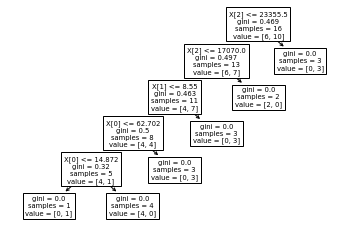

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
#plot a decision tree
tree.plot_tree(dtree)